## **Car Evaluation Analysis**

DATASET upload

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

In [3]:
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [4]:
from os import cpu_count
df=pd.read_csv('/content/drive/MyDrive/DATA SCIENCE/PROJECTS/Freelance/TASK 1 /TASK 1 A/Car Evaluation dataset.csv',names=columns)

In [5]:
df.head(5)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


# **EDA**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [7]:
df.describe() 

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [8]:
for col in df:
    print(col,df[col].unique())

buying ['vhigh' 'high' 'med' 'low']
maint ['vhigh' 'high' 'med' 'low']
doors ['2' '3' '4' '5more']
persons ['2' '4' 'more']
lug_boot ['small' 'med' 'big']
safety ['low' 'med' 'high']
class ['unacc' 'acc' 'vgood' 'good']


In [9]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [10]:
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [11]:
df.duplicated().sum()

0

# **Data Preprocessing**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


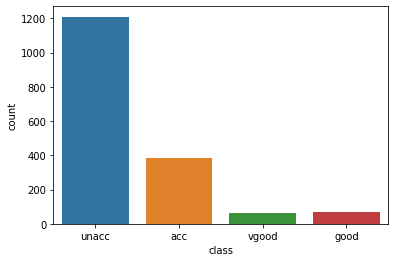

In [12]:
sns.countplot(df['class'])

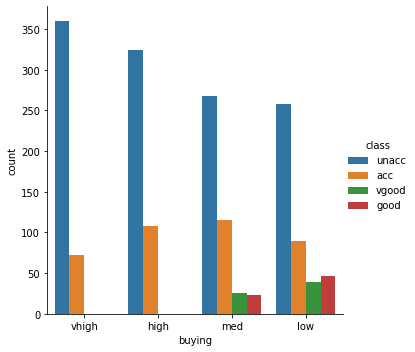

In [13]:
sns.catplot(kind='count', x='buying', hue='class', data=df)

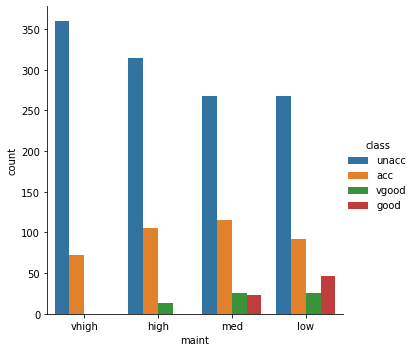

In [14]:
sns.catplot(kind='count', x='maint', hue='class', data=df)

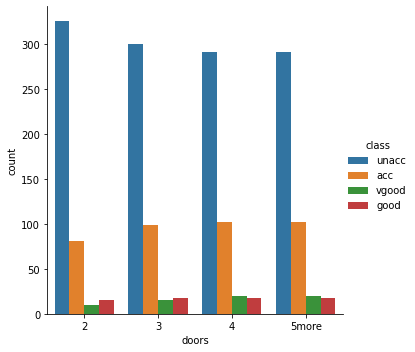

In [15]:
sns.catplot(kind='count', x='doors', hue='class', data=df)

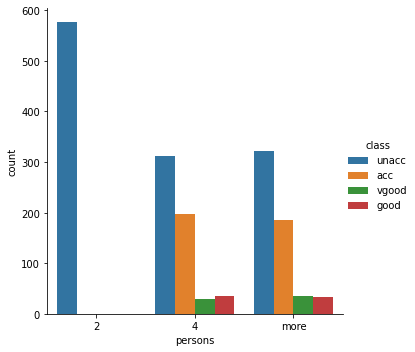

In [16]:
sns.catplot(kind='count', x='persons', hue='class', data=df)

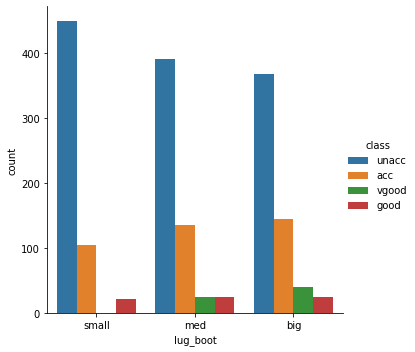

In [17]:
sns.catplot(kind='count', x='lug_boot', hue='class', data=df)

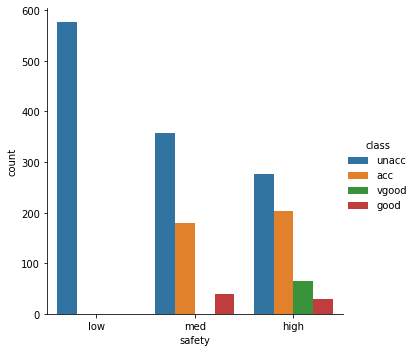

In [18]:
sns.catplot(kind='count', x='safety', hue='class', data=df)

LABEL ENCODING

In [19]:
by= LabelEncoder()
by_labels = by.fit_transform(df.buying)
by_labels = pd.Series(by_labels)
df['buying'] = by_labels
df

,buying,maint,doors,persons,lug_boot,safety,class
0,3,vhigh,2,2,small,low,unacc
1,3,vhigh,2,2,small,med,unacc
2,3,vhigh,2,2,small,high,unacc
3,3,vhigh,2,2,med,low,unacc
4,3,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,1,low,5more,more,med,med,good
1724,1,low,5more,more,med,high,vgood
1725,1,low,5more,more,big,low,unacc
1726,1,low,5more,more,big,med,good


In [20]:
df['buying'].value_counts()

3    432
0    432
2    432
1    432
Name: buying, dtype: int64

In [21]:
mt= LabelEncoder()
mt_labels = mt.fit_transform(df.maint)
mt_labels = pd.Series(mt_labels)
df['maint'] = mt_labels
df

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,2,2,small,low,unacc
1,3,3,2,2,small,med,unacc
2,3,3,2,2,small,high,unacc
3,3,3,2,2,med,low,unacc
4,3,3,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,1,1,5more,more,med,med,good
1724,1,1,5more,more,med,high,vgood
1725,1,1,5more,more,big,low,unacc
1726,1,1,5more,more,big,med,good


In [22]:
ds= LabelEncoder()
ds_labels = ds.fit_transform(df.doors)
ds_labels = pd.Series(ds_labels)
df['doors'] = ds_labels
df

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,2,small,low,unacc
1,3,3,0,2,small,med,unacc
2,3,3,0,2,small,high,unacc
3,3,3,0,2,med,low,unacc
4,3,3,0,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,1,1,3,more,med,med,good
1724,1,1,3,more,med,high,vgood
1725,1,1,3,more,big,low,unacc
1726,1,1,3,more,big,med,good


In [23]:
ps= LabelEncoder()
ps_labels = ps.fit_transform(df.persons)
ps_labels = pd.Series(ps_labels)
df['persons'] = ps_labels
df

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,small,low,unacc
1,3,3,0,0,small,med,unacc
2,3,3,0,0,small,high,unacc
3,3,3,0,0,med,low,unacc
4,3,3,0,0,med,med,unacc
...,...,...,...,...,...,...,...
1723,1,1,3,2,med,med,good
1724,1,1,3,2,med,high,vgood
1725,1,1,3,2,big,low,unacc
1726,1,1,3,2,big,med,good


In [24]:
lt= LabelEncoder()
lt_labels = lt.fit_transform(df.lug_boot)
lt_labels = pd.Series(lt_labels)
df['lug_boot'] = lt_labels
df

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,low,unacc
1,3,3,0,0,2,med,unacc
2,3,3,0,0,2,high,unacc
3,3,3,0,0,1,low,unacc
4,3,3,0,0,1,med,unacc
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,med,good
1724,1,1,3,2,1,high,vgood
1725,1,1,3,2,0,low,unacc
1726,1,1,3,2,0,med,good


In [25]:
sy= LabelEncoder()
sy_labels = lt.fit_transform(df.safety)
sy_labels = pd.Series(sy_labels)
df['safety'] = sy_labels
df

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,unacc
1,3,3,0,0,2,2,unacc
2,3,3,0,0,2,0,unacc
3,3,3,0,0,1,1,unacc
4,3,3,0,0,1,2,unacc
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,good
1724,1,1,3,2,1,0,vgood
1725,1,1,3,2,0,1,unacc
1726,1,1,3,2,0,2,good


In [26]:
df.rename(columns = {'class':'target'}, inplace = True)

In [27]:
df['target']

0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1723     good
1724    vgood
1725    unacc
1726     good
1727    vgood
Name: target, Length: 1728, dtype: object

In [28]:
cs= LabelEncoder()
cs_labels = cs.fit_transform(df.target)
cs_labels = pd.Series(cs_labels)
df['target'] = cs_labels
df

,buying,maint,doors,persons,lug_boot,safety,target
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


In [29]:
matrix=df.corr()

In [30]:
matrix['target'].sort_values(ascending=False)       

target      1.000000
buying      0.051424
maint       0.040194
lug_boot    0.033184
safety     -0.021044
doors      -0.031327
persons    -0.299468
Name: target, dtype: float64

# **MODEL EVALUATION**

In [31]:
from sklearn.model_selection import StratifiedShuffleSplit
split= StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(df,df['target']):
  strat_train_set=df.loc[train_index]
  strat_test_set=df.loc[test_index]


In [32]:
df_train=strat_train_set
df_test=strat_test_set

In [33]:
df_train['target'].value_counts()

2    968
0    307
1     55
3     52
Name: target, dtype: int64

In [34]:
df_test['target'].value_counts()

2    242
0     77
1     14
3     13
Name: target, dtype: int64

In [35]:
df_trainx=df_train.drop(columns='target')
df_trainy=df_train['target']


In [36]:
df_testx=df_test.drop(columns='target')
df_testy=df_test['target']


In [40]:
from sklearn import metrics,svm
import matplotlib.pyplot as plt

def eval(testx,testy,model):

  predy=model.predict(testx)
  print("Confusion matrix:\n",metrics.confusion_matrix(testy, predy))
  sns.heatmap(metrics.confusion_matrix(testy, predy), annot=True);
  plt.show()
  print("Accuracy:\n",metrics.accuracy_score(testy, predy))
  print("classification_report:\n",metrics.classification_report(testy, predy))

  #for roc
  proby = model.predict_proba(testx)
  predprobs = [p[1] for p in proby]
  #print("AUROC : ", metrics.roc_auc_score(testy, predprobs) )
 
  fpr, tpr, thresholds = metrics.roc_curve(testy, predy,
  pos_label=4)
  #metrics.plot_roc_curve(model, testx, testy)
  #precision, recall, thresholds = metrics.precision_recall_curve( testy, predy,pos_label=4)
  #print("PRC CURVE")
  #metrics.plot_precision_recall_curve(model, testx, testy)
  #plt.show()
  from sklearn.metrics import matthews_corrcoef
  print("MCC SCORE :",matthews_corrcoef(testy, predy))

  from sklearn.metrics import mean_squared_error
  print("mean_squared_error",mean_squared_error(testy, predy))

  print('Fp rate: '+str(fpr[0]))   #FPR for 1st class will be at index 0
  print('Fp rate: '+str(fpr[1]))   #FPR for 1st class will be at index 1
  tpr = metrics.recall_score(testy, predy, average='macro')
  print ('Tp rate: ',tpr)

**RandomForestClassifier**

In [41]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(df_trainx,df_trainy)

RandomForestClassifier()

Confusion matrix:
 [[ 74   1   2   0]
 [  2  12   0   0]
 [  2   0 240   0]
 [  1   0   0  12]]


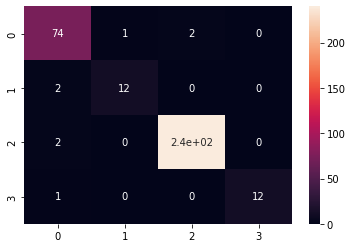

Accuracy:
 0.976878612716763
classification_report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95        77
           1       0.92      0.86      0.89        14
           2       0.99      0.99      0.99       242
           3       1.00      0.92      0.96        13

    accuracy                           0.98       346
   macro avg       0.96      0.93      0.95       346
weighted avg       0.98      0.98      0.98       346

MCC SCORE : 0.9494800942822291
mean_squared_error 0.08092485549132948
Fp rate: 0.0
Fp rate: 0.03468208092485549
Tp rate:  0.9332485696122059


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


In [42]:
eval(df_testx,df_testy,clf)

**KNeighborsClassifier



In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(df_trainx,df_trainy)

KNeighborsClassifier()

Confusion matrix:
 [[ 63   0  14   0]
 [  8   6   0   0]
 [  1   0 241   0]
 [  5   1   2   5]]


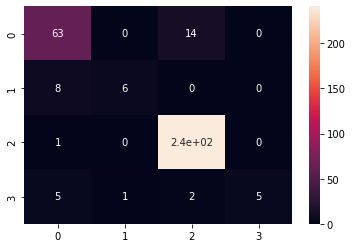

Accuracy:
 0.9104046242774566
classification_report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82        77
           1       0.86      0.43      0.57        14
           2       0.94      1.00      0.97       242
           3       1.00      0.38      0.56        13

    accuracy                           0.91       346
   macro avg       0.90      0.66      0.73       346
weighted avg       0.91      0.91      0.90       346

MCC SCORE : 0.7960161181003457
mean_squared_error 0.3439306358381503
Fp rate: 0.0
Fp rate: 0.014450867052023121
Tp rate:  0.6568090999909182


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


In [44]:
eval(df_testx,df_testy,knn)